In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Food Allergy Prediction/food_allergy_data.csv')

<ipython-input-8-95b454ab03f9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')
<ipython-input-8-95b454ab03f9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')


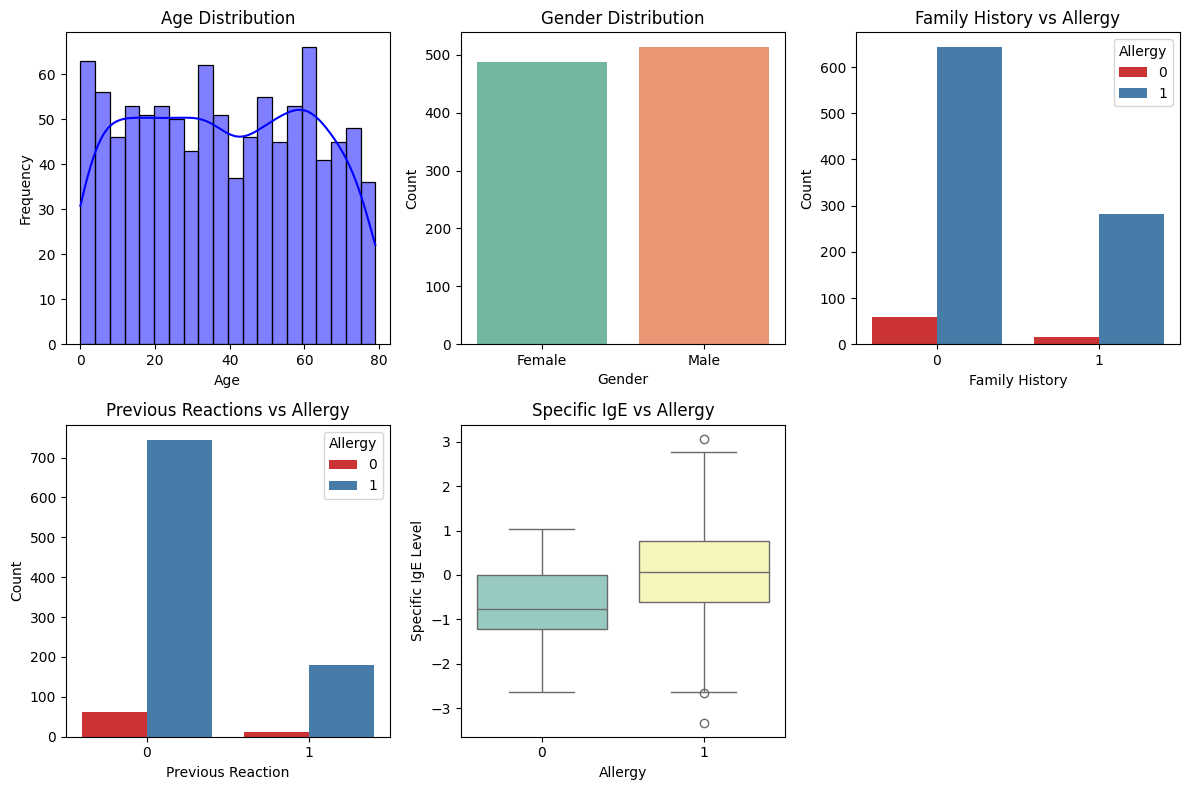

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
# Visualizations
plt.figure(figsize=(12, 8))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Family History and Allergy
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='FamilyHistory', hue='Allergy', palette='Set1')
plt.title('Family History vs Allergy')
plt.xlabel('Family History')
plt.ylabel('Count')

# Previous Reactions and Allergy
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='PreviousReaction', hue='Allergy', palette='Set1')
plt.title('Previous Reactions vs Allergy')
plt.xlabel('Previous Reaction')
plt.ylabel('Count')

# Specific IgE and Allergy
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')
plt.title('Specific IgE vs Allergy')
plt.xlabel('Allergy')
plt.ylabel('Specific IgE Level')

plt.tight_layout()
plt.show()

In [9]:
# Handle categorical feature 'Gender' using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')  # Create OneHotEncoder object
gender_encoded = ohe.fit_transform(data[['Gender']]).toarray()  # Fit and transform 'Gender' column

# Create a DataFrame from the encoded features
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Drop the original 'Gender' column and concatenate the encoded features
data = data.drop('Gender', axis=1)
data = pd.concat([data, gender_df], axis=1)

# Correct the column name if needed (e.g., if it's 'Allergy')
X = data.drop('Allergy', axis=1).values  # Replace 'Allergy' with the actual column name if different
y = data['Allergy'].values  # Replace 'Allergy' with the actual column name if different

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.5277 - accuracy: 0.8922 - val_loss: 0.3831 - val_accuracy: 0.9438
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.9203 - val_loss: 0.2482 - val_accuracy: 0.9438
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.9203 - val_loss: 0.1907 - val_accuracy: 0.9438
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.9203 - val_loss: 0.1578 - val_accuracy: 0.9438
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9219 - val_loss: 0.1308 - val_accuracy: 0.9438
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1524 - accuracy: 0.9328 - val_loss: 0.1128 - val_accuracy: 0.9563
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.9453 - val_loss: 0.1004 - val_accuracy: 0.9688
Epoch 8/50
20/20 [=